# 1.Prétraitement et exploration des données


# **1.1. Importation de bibliothèques et de jeux de données**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataframe = pd.read_excel("Projet.xlsx")
print(dataframe)

                          Operating System  Client Version    Status  \
0            Windows 10 Enterprise Edition  14.3.1169.0100   Enabled   
1             Windows 10 Education Edition  14.3.1169.0100   Enabled   
2     Windows Server 2016 Standard Edition  14.3.1169.0100   Enabled   
3            Windows 10 Enterprise Edition  14.3.1169.0100   Enabled   
4            Windows 10 Enterprise Edition  14.3.1169.0100   Enabled   
...                                    ...             ...       ...   
3096         Windows 10 Enterprise Edition  14.3.1169.0100  Disabled   
3097         Windows 10 Enterprise Edition  14.3.1169.0100  Disabled   
3098          Windows 7 Enterprise Edition  14.3.1169.0100  Disabled   
3099          Windows 7 Enterprise Edition  14.3.1169.0100  Disabled   
3100         Windows 10 Enterprise Edition  14.3.1169.0100  Disabled   

     Auto-Protect On Endpoint Detection and Response Status  \
0            Enabled                              Connected   
1        

In [7]:
dataframe.head()

,Operating System,Client Version,Status,Auto-Protect On,Endpoint Detection and Response Status,Last Scan Time,Last Virus Time,Download Insight On,Intrusion Prevention On,Early Launch Antimalware On,Restart Required,Computer Name,Number Of Processors,Server Name,Current User,Worst Detection
0,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:04,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNP7CPS-21,8.0,SEC-SrvAV1,AGENCEP7,(Severity 3) Antivirus - Heuristic
1,Windows 10 Education Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNL2RPV-21,8.0,SEC-SrvAV1,2023,No detections
2,Windows Server 2016 Standard Edition,14.3.1169.0100,Enabled,Enabled,Disconnected,04/17/2022 18:00:02,Never,Enabled - Advanced protection,Enabled,Enabled,No,WIN-TQ1A3BV435R,8.0,SEC-SrvAV1,Administrator,No detections
3,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/18/2022 08:53:03,Never,Enabled - Advanced protection,Enabled,Enabled,No,GE-548,12.0,SEC-SrvAV1,9145,No detections
4,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNAGR4GUI,8.0,SEC-SrvAV1,4837,No detections


In [8]:
dataframe.isnull().sum()

Operating System                           0
Client Version                             0
Status                                     0
Auto-Protect On                            0
Endpoint Detection and Response Status    11
Last Scan Time                             0
Last Virus Time                            0
Download Insight On                        0
Intrusion Prevention On                    0
Early Launch Antimalware On                0
Restart Required                           0
Computer Name                             11
Number Of Processors                      11
Server Name                               11
Current User                              11
Worst Detection                            0
dtype: int64

In [9]:
dataframe.shape

(3101, 16)

# 1.2. Description statistique

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Operating System                        3101 non-null   object 
 1   Client Version                          3101 non-null   object 
 2   Status                                  3101 non-null   object 
 3   Auto-Protect On                         3101 non-null   object 
 4   Endpoint Detection and Response Status  3090 non-null   object 
 5   Last Scan Time                          3101 non-null   object 
 6   Last Virus Time                         3101 non-null   object 
 7   Download Insight On                     3101 non-null   object 
 8   Intrusion Prevention On                 3101 non-null   object 
 9   Early Launch Antimalware On             3101 non-null   object 
 10  Restart Required                        3101 non-null   obje

In [11]:
dataframe.describe(include=['object'])

,Operating System,Client Version,Status,Auto-Protect On,Endpoint Detection and Response Status,Last Scan Time,Last Virus Time,Download Insight On,Intrusion Prevention On,Early Launch Antimalware On,Restart Required,Computer Name,Server Name,Current User,Worst Detection
count,3101,3101,3101,3101,3090,3101,3101,3101,3101,3101,3101,3090,3090,3090,3101
unique,12,5,2,2,4,658,208,4,3,3,2,3088,2,2540,8
top,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:02,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNM8CC-21,SEC-SrvAV1,Administrator,No detections
freq,2031,3096,2900,3094,3034,497,2894,3087,3086,2671,3084,2,3087,73,2342


In [12]:
dataframe["Client Version"].value_counts()

14.3.1169.0100    3096
14.3.5413.3000       2
14.3.3452.1000       1
12.1.4013.4013       1
12.1.5337.5000       1
Name: Client Version, dtype: int64

In [13]:
dataframe["Worst Detection"].value_counts()

No detections                                2342
(Severity 0) Viral                            496
(Severity 3) Antivirus - Heuristic            208
(Severity 4) Other                             49
(Severity 14) SONAR Proactive Threat Scan       2
(Severity 7) Trackware                          2
(Severity 6) Spyware                            1
(Severity 10) Adware                            1
Name: Worst Detection, dtype: int64

In [14]:
dataframe["Operating System"].value_counts()

Windows 10 Enterprise Edition                2031
Windows 10 Education Edition                  512
Windows 7 Enterprise Edition                  381
Windows Server 2019 Standard Edition           51
Windows Server 2012 R2 Standard Edition        37
Windows Server 2008 R2 Enterprise Edition      23
Windows 7 Professional Edition                 20
Windows Server 2016 Standard Edition           19
Windows 10 Professional Edition                16
Windows 10 Enterprise LTSB                      5
Windows Server 2012 R2 Datacenter Edition       4
Windows 10 Pro for Workstations                 2
Name: Operating System, dtype: int64

In [15]:
dataframe["Last Virus Time"].value_counts()

Never                  2894
06/22/2021 11:00:37       1
03/14/2022 10:19:18       1
2021-10-11 14:40:48       1
2021-04-11 10:22:24       1
                       ... 
11/30/2021 18:18:56       1
2022-02-01 18:16:25       1
2022-05-04 19:37:57       1
2021-03-06 16:31:44       1
2022-06-03 22:53:19       1
Name: Last Virus Time, Length: 208, dtype: int64

In [16]:
dataframe["Current User"].value_counts()

Administrator     73
Administrateur    70
stagiaire         13
03708-admin       10
pcssiege           9
                  ..
2706               1
2705               1
2704               1
2702               1
4096               1
Name: Current User, Length: 2540, dtype: int64

In [17]:
dataframe['Server Name'].unique()

array(['SEC-SrvAV1', nan, 'SRV-Repli-AV'], dtype=object)

In [18]:
dataframe['Server Name'].value_counts()

SEC-SrvAV1      3087
SRV-Repli-AV       3
Name: Server Name, dtype: int64

In [19]:
duplicate = dataframe.duplicated()
print(duplicate.sum())
dataframe[duplicate]

1


,Operating System,Client Version,Status,Auto-Protect On,Endpoint Detection and Response Status,Last Scan Time,Last Virus Time,Download Insight On,Intrusion Prevention On,Early Launch Antimalware On,Restart Required,Computer Name,Number Of Processors,Server Name,Current User,Worst Detection
1555,Windows Server 2019 Standard Edition,14.3.1169.0100,Enabled,Enabled,NaN,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,Yes,NaN,NaN,NaN,NaN,No detections


In [20]:
dataframe.drop_duplicates(inplace=True) 

In [21]:
duplicate = dataframe.duplicated()
duplicate.sum()

0

In [22]:
pd.get_dummies(dataframe, columns=['Status']) .head()

,Operating System,Client Version,Auto-Protect On,Endpoint Detection and Response Status,Last Scan Time,Last Virus Time,Download Insight On,Intrusion Prevention On,Early Launch Antimalware On,Restart Required,Computer Name,Number Of Processors,Server Name,Current User,Worst Detection,Status_Disabled,Status_Enabled
0,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Connected,04/17/2022 18:00:04,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNP7CPS-21,8.0,SEC-SrvAV1,AGENCEP7,(Severity 3) Antivirus - Heuristic,0,1
1,Windows 10 Education Edition,14.3.1169.0100,Enabled,Connected,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNL2RPV-21,8.0,SEC-SrvAV1,2023,No detections,0,1
2,Windows Server 2016 Standard Edition,14.3.1169.0100,Enabled,Disconnected,04/17/2022 18:00:02,Never,Enabled - Advanced protection,Enabled,Enabled,No,WIN-TQ1A3BV435R,8.0,SEC-SrvAV1,Administrator,No detections,0,1
3,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Connected,04/18/2022 08:53:03,Never,Enabled - Advanced protection,Enabled,Enabled,No,GE-548,12.0,SEC-SrvAV1,9145,No detections,0,1
4,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Connected,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNAGR4GUI,8.0,SEC-SrvAV1,4837,No detections,0,1


In [23]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3100 entries, 0 to 3100
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Operating System                        3100 non-null   object 
 1   Client Version                          3100 non-null   object 
 2   Status                                  3100 non-null   object 
 3   Auto-Protect On                         3100 non-null   object 
 4   Endpoint Detection and Response Status  3090 non-null   object 
 5   Last Scan Time                          3100 non-null   object 
 6   Last Virus Time                         3100 non-null   object 
 7   Download Insight On                     3100 non-null   object 
 8   Intrusion Prevention On                 3100 non-null   object 
 9   Early Launch Antimalware On             3100 non-null   object 
 10  Restart Required                        3100 non-null   obje

<AxesSubplot:xlabel='Number Of Processors', ylabel='Number Of Processors'>

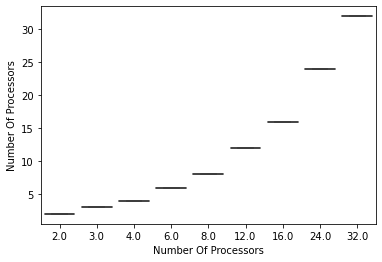

In [24]:
#Box plot

sns.boxplot(x='Number Of Processors',y='Number Of Processors',data=dataframe)

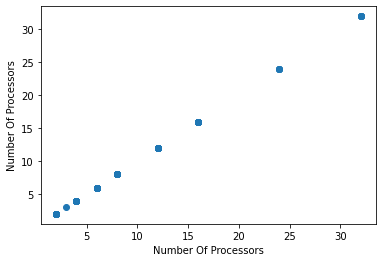

In [25]:

#scatter plot
plt.scatter(dataframe['Number Of Processors'],dataframe['Number Of Processors'])
plt.xlabel('Number Of Processors')
plt.ylabel('Number Of Processors')
plt.show()

In [26]:
count,bin_edges = np.histogram(dataframe['peak-rpm'])
df['peak-rpm'].plot(kind='hist',xticks=bin_edges)
plt.xlabel('Number Of Processors')
plt.ylabel('Number Of Processors')
plt.grille()
plt.show()

KeyError: 'peak-rpm'

In [ ]:
pd.plotting.scatter_matrix(dataframe,figsize=(20,10),c=dataframe['Worst Detection']);

In [ ]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.countplot("Worst Detection", data=dataframe)
plt.xticks(rotation=90, size=12)
without_hue(ax, dataframe['Worst Detection'])
#dataframe["Worst Detection"].value_counts(normalize=True).plot(kind='bar')

In [ ]:
dataframe["Status"].value_counts(normalize=True).plot(kind='pie')

In [ ]:
plt.figure(figsize=(14,6))
dataframe["Worst Detection"].value_counts(normalize=True).plot(kind='pie')

In [ ]:
dataframe["Restart Required"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
dataframe["Server Name"].value_counts(normalize=True).plot(kind='bar')

In [ ]:
dataframe["Restart Required"].hist()

# 1.3. Test KHI2

In [35]:
mycolumns = ["Operating System","Worst Detection"] 
data = dataframe[mycolumns]
table = pd.crosstab(dataframe["Operating System"], dataframe["Worst Detection"])
table


Worst Detection,(Severity 0) Viral,(Severity 10) Adware,(Severity 14) SONAR Proactive Threat Scan,(Severity 3) Antivirus - Heuristic,(Severity 4) Other,(Severity 6) Spyware,(Severity 7) Trackware,No detections
Operating System,,,,,,,,
Windows 10 Education Edition,48,0,0,14,4,0,0,446
Windows 10 Enterprise Edition,271,0,2,176,24,1,2,1555
Windows 10 Enterprise LTSB,2,0,0,0,0,0,0,3
Windows 10 Pro for Workstations,0,0,0,0,0,0,0,2
Windows 10 Professional Edition,1,0,0,0,0,0,0,15
Windows 7 Enterprise Edition,154,1,0,9,19,0,0,198
Windows 7 Professional Edition,13,0,0,1,2,0,0,4
Windows Server 2008 R2 Enterprise Edition,5,0,0,1,0,0,0,17
Windows Server 2012 R2 Datacenter Edition,0,0,0,1,0,0,0,3


In [36]:
from scipy.stats import chi2_contingency 
  
stat, p, dof, expected = chi2_contingency(table) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.1677748317009053e-38
Dependent (reject H0)


In [37]:
dataframe["Windows10"] = 'no'
dataframe.loc[dataframe["Operating System"] == "Windows 7 Professional Edition","Windows10"]= "yes"


In [38]:
dataframe["virus"] = "yes"
dataframe.loc[dataframe["Last Virus Time"]== "Never","virus"] = "no"
dataframe.head()

,Operating System,Client Version,Status,Auto-Protect On,Endpoint Detection and Response Status,Last Scan Time,Last Virus Time,Download Insight On,Intrusion Prevention On,Early Launch Antimalware On,Restart Required,Computer Name,Number Of Processors,Server Name,Current User,Worst Detection,Windows10,virus
0,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:04,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNP7CPS-21,8.0,SEC-SrvAV1,AGENCEP7,(Severity 3) Antivirus - Heuristic,no,no
1,Windows 10 Education Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNL2RPV-21,8.0,SEC-SrvAV1,2023,No detections,no,no
2,Windows Server 2016 Standard Edition,14.3.1169.0100,Enabled,Enabled,Disconnected,04/17/2022 18:00:02,Never,Enabled - Advanced protection,Enabled,Enabled,No,WIN-TQ1A3BV435R,8.0,SEC-SrvAV1,Administrator,No detections,no,no
3,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/18/2022 08:53:03,Never,Enabled - Advanced protection,Enabled,Enabled,No,GE-548,12.0,SEC-SrvAV1,9145,No detections,no,no
4,Windows 10 Enterprise Edition,14.3.1169.0100,Enabled,Enabled,Connected,04/17/2022 18:00:00,Never,Enabled - Advanced protection,Enabled,Enabled,No,TNAGR4GUI,8.0,SEC-SrvAV1,4837,No detections,no,no


In [39]:
table2 = pd.crosstab(dataframe["virus"], dataframe["Operating System"])
stat, p, dof, expected = chi2_contingency(table2) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 


p value is 0.07457973184716424
Dependent (reject H0)


In [42]:
table2

Operating System,Windows 10 Education Edition,Windows 10 Enterprise Edition,Windows 10 Enterprise LTSB,Windows 10 Pro for Workstations,Windows 10 Professional Edition,Windows 7 Enterprise Edition,Windows 7 Professional Edition,Windows Server 2008 R2 Enterprise Edition,Windows Server 2012 R2 Datacenter Edition,Windows Server 2012 R2 Standard Edition,Windows Server 2016 Standard Edition,Windows Server 2019 Standard Edition
virus,,,,,,,,,,,,
no,467,1908,5,2,16,352,16,21,3,35,19,49
yes,45,123,0,0,0,29,4,2,1,2,0,1


In [43]:
table3 = pd.crosstab(dataframe["virus"], dataframe["Status"])
stat, p, dof, expected = chi2_contingency(table3) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 


p value is 0.15042505293012456
Independent (H0 holds true)


In [44]:
table3

Status,Disabled,Enabled
virus,,
no,193,2700
yes,8,199


In [45]:
table4 = pd.crosstab(dataframe["virus"], dataframe["Restart Required"])
stat, p, dof, expected = chi2_contingency(table4) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 


p value is 0.6647448674621166
Independent (H0 holds true)


In [46]:
table4

Restart Required,No,Yes
virus,,
no,2878,15
yes,206,1


In [47]:
table5 = pd.crosstab(dataframe["virus"], dataframe["Download Insight On"])
stat, p, dof, expected = chi2_contingency(table3) 
  
alpha = 0.1
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 


p value is 0.15042505293012456
Independent (H0 holds true)


In [48]:
table5

Download Insight On,Client not reporting status,Component is Malfunctioning - Advanced protection,Enabled - Advanced protection,Enabled - Basic protection
virus,,,,
no,7,1,2879,6
yes,0,0,207,0


In [49]:
table2 = pd.crosstab(dataframe["virus"], dataframe["Operating System"])
stat, p, dof, expected = chi2_contingency(table2) 
  
alpha = 0.10
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 


p value is 0.07457973184716424
Dependent (reject H0)


In [50]:
pd.crosstab(dataframe['virus'],dataframe['Restart Required'],margins=True)

Restart Required,No,Yes,All
virus,,,
no,2878,15,2893
yes,206,1,207
All,3084,16,3100


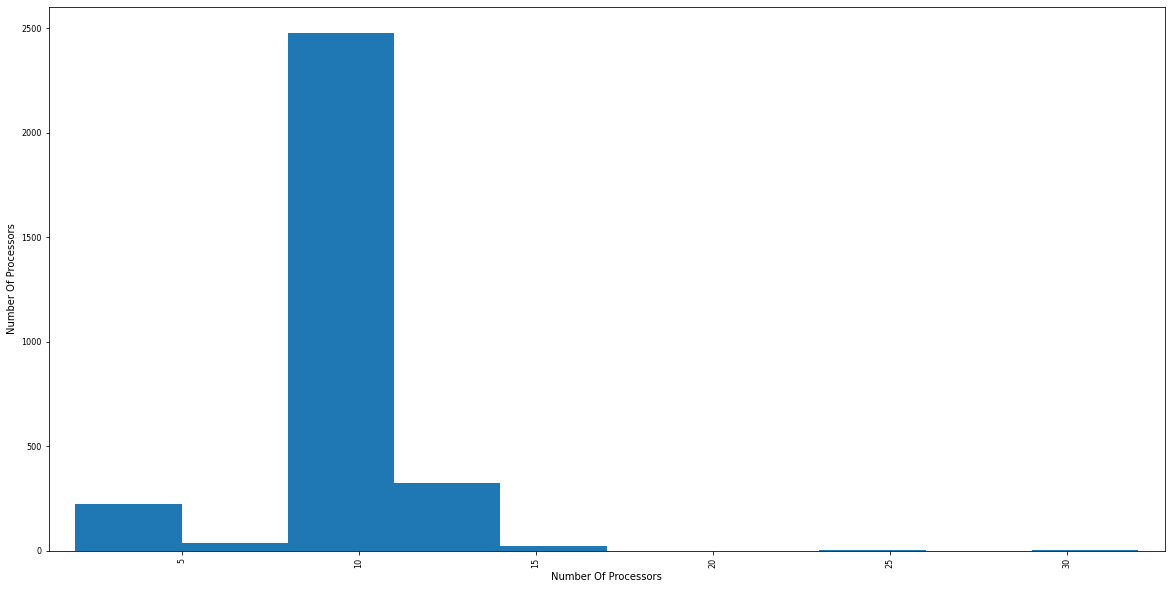

In [51]:
pd.plotting.scatter_matrix(dataframe,figsize=(20,10),c=dataframe['Worst Detection']);

In [52]:
dataframe['Restart Required']=pd.to_numeric(dataframe['Restart Required'],errors='coerce')


In [53]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3100 entries, 0 to 3100
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Operating System                        3100 non-null   object 
 1   Client Version                          3100 non-null   object 
 2   Status                                  3100 non-null   object 
 3   Auto-Protect On                         3100 non-null   object 
 4   Endpoint Detection and Response Status  3090 non-null   object 
 5   Last Scan Time                          3100 non-null   object 
 6   Last Virus Time                         3100 non-null   object 
 7   Download Insight On                     3100 non-null   object 
 8   Intrusion Prevention On                 3100 non-null   object 
 9   Early Launch Antimalware On             3100 non-null   object 
 10  Restart Required                        0 non-null      floa

In [ ]:
dataframe['Client Version']=pd.to_numeric(dataframe['Client Version'],errors='coerce')


In [ ]:
dataframe.info()

In [ ]:

#scatter plot
plt.scatter(dataframe['Worst Detection'],dataframe['virus'])
plt.xlabel('Worst Detection')
plt.ylabel('virus')
plt.show()

In [ ]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns